<a href="https://colab.research.google.com/github/SaanviGoel30/Options-Pricing-Model/blob/main/Options_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing library
!pip install yfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [ ]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2023)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(start=start, end=end)

df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-16 00:00:00-05:00,6063.790039,6085.189941,6059.140137,6074.080078,4391100000,0.0,0.0
2024-12-17 00:00:00-05:00,6052.549805,6057.680176,6035.189941,6050.609863,4544500000,0.0,0.0
2024-12-18 00:00:00-05:00,6047.649902,6070.669922,5867.790039,5872.160156,5246960000,0.0,0.0
2024-12-19 00:00:00-05:00,5912.709961,5935.520020,5866.069824,5867.080078,4896880000,0.0,0.0
2024-12-20 00:00:00-05:00,5842.000000,5982.060059,5832.299805,5930.850098,8223220000,0.0,0.0


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,0.0,0.0
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,0.0,0.0


In [ ]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options  #to get the date of different expiration time

('2024-12-23',
 '2024-12-24',
 '2024-12-26',
 '2024-12-27',
 '2024-12-30',
 '2024-12-31',
 '2025-01-02',
 '2025-01-03',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08',
 '2025-01-09',
 '2025-01-10',
 '2025-01-13',
 '2025-01-14',
 '2025-01-15',
 '2025-01-16',
 '2025-01-17',
 '2025-01-21',
 '2025-01-22',
 '2025-01-24',
 '2025-01-27',
 '2025-01-29',
 '2025-01-31',
 '2025-02-07',
 '2025-02-21',
 '2025-02-28',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-10-17',
 '2025-11-21',
 '2025-12-19',
 '2026-01-16',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [ ]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [ ]:
dfo_exp.calls.head() #Data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW241224C05000000,2024-12-18 20:41:14+00:00,5000.0,898.20,921.9,940.7,0.00000,0.00000,1.0,2.0,0.712161,True,REGULAR,USD
1,SPXW241224C05150000,2024-12-19 14:31:36+00:00,5150.0,780.12,772.1,790.7,0.00000,0.00000,1.0,1.0,0.613285,True,REGULAR,USD
2,SPXW241224C05400000,2024-12-06 15:05:30+00:00,5400.0,706.70,522.3,541.0,0.00000,0.00000,NaN,NaN,0.686221,True,REGULAR,USD
3,SPXW241224C05650000,2024-11-18 20:26:03+00:00,5650.0,298.33,272.8,291.3,0.00000,0.00000,NaN,1.0,0.418341,True,REGULAR,USD
4,SPXW241224C05700000,2024-12-20 09:08:45+00:00,5700.0,164.31,223.3,241.9,-197.39001,-54.57285,10.0,8.0,0.367407,True,REGULAR,USD


## **Calculation of u and d**

u =size of the up move factor= e^{σ\sqrt{t}}, and

d =size of the down move factor= = e^{−σ\sqrt{t}} = 1/ u

σ is the annual volatility of the underlying asset’s returns and t is the length of the step in the binomial model.

To calculate annual volatility:-

First calculate the daily returns of the asset

Then calculate its standard deviation

Then multiply it by sqrt(252) as in a year there are 252 trading days.

In [ ]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """
    log_return = np.log(df['Close'] / df['Close'].shift(1))
    log_return = log_return.dropna()  #to remove NaN values caused by shifting

    #standard deviation of daily returns
    daily_vol = log_return.std()
    vol = daily_vol * np.sqrt(252)

    return vol

In [ ]:
vol = annual_vol(df)
vol

0.1254703352977609

In [ ]:
dfo.options[1]

'2024-12-24'

In [ ]:
date.today()

datetime.date(2024, 12, 22)

In [ ]:
expiration_date = pd.to_datetime(dfo.options[1]).date()
today = date.today()
days_left = (expiration_date - today).days
N = 100          #Number of steps
T = days_left/365      #Calculate the number of days left for expiry from your calculation in years, change accordingly
t = T/N

In [ ]:
u = np.exp(vol * np.sqrt(t))
u

1.000929204534108

In [ ]:
d = 1/u
d

0.9990716580854082

Let S denote the price of the stock today, and let T denote the time until expiry of the option, in years. We'll divide this period into N equal time intervals, of length ΔT=T/N Assume that in each time period, the stock price changes by either multiplying by u, which we consider as an up movement, or by d, the down movement. We need to assume d<erΔT<u, where r is the risk-free interest rate, to avoid the possibility of arbitrage. If k time periods have passed, m is number if up movement : S(k,m)=S * u ** m * d ** (k-m)

C(N,m)=max(S(N,m)−K,0)

Once we know the value of the option at the end of the tree, we can work backward as before to figure out the value of the option at every node. Let C(k,m) denote the value of the option at the node that is k steps into the tree with m up movements in the stock price. The two following nodes in the tree are C(k+1,m+1) (if the price moves up) and C(k+1,m) (if the price moves down). If we let p denote the risk-neutral probability

p = (e**(rΔT)−d)/(u−d)

of a movement up, then the expected value of the option in the next step is pC(k+1,m+1)+(1−p)C(k+1,m)

and so the value of the option at C(k,m) is the above expected value, discounted to today using the risk-free interest rate. That is

C(k,m)=e−rΔT(pC(k+1,m+1)+(1−p)C(k+1,m))
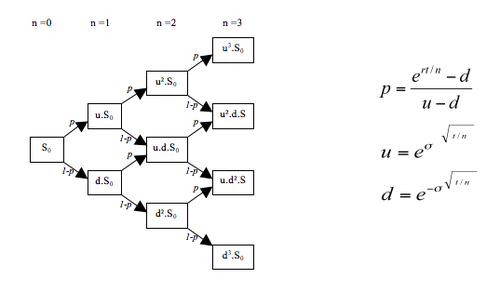

In [ ]:
def first_binomial_call(S, K, T, r, u, d, N):
    """
    Implementation of binomial pricing model

    Parameters
    ----------
    S : float
        stock price

    K : float
        strike price

    T : float
        expiry time in years

    r : float
        risk free rate which could be taken out of the yield of US treasury bonds

    u : float
        size of upfactor move

    d : float
        size of downfactor move

    N : int
        number of steps in binomial model

    Returns
    -------
    C : dict
        the binary pricing model in the form of dictionary
    """

    # Calculate step size and risk-neutral probability
    t = T / N  # time per step
    q = (pow(1 + r, t) - d) / (u - d)  # risk-neutral probability

    # Initialize price and option value dictionaries
    stock_prices = {}
    option_values = {}

    # Compute stock prices and option values at maturity
    for i in range(N + 1):
        # Stock price at node (N, i)
        stock_prices[(N, i)] = S * (u ** i) * (d ** (N - i))
        # Option value
        option_values[(N, i)] = max(stock_prices[(N, i)] - K, 0)

    # Step back through the tree
    for n in range(N - 1, -1, -1):  # iterate backwards
        for i in range(n + 1):
            option_values[(n, i)] = (
                q * option_values[(n + 1, i + 1)] +
                (1 - q) * option_values[(n + 1, i)]
            ) / pow(1 + r, t)

  # Return the option pricing tree
    return option_values


In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated by n step binomial model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = first_binomial_call(S = df['Close'][len(df)-1], K = K, T = T, r=0.01*t, u = u, d =d, N=N)[(1, 1)]
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
5000.0,936.361085
5150.0,786.361086
5400.0,536.361087
5650.0,286.361087
5700.0,236.361131


In [ ]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
5000.0,898.20
5150.0,780.12
5400.0,706.70
5650.0,298.33
5700.0,164.31


In [ ]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
5000.0,936.361085,898.20
5150.0,786.361086,780.12
5400.0,536.361087,706.70
5650.0,286.361087,298.33
5700.0,236.361131,164.31
5730.0,206.361766,183.61
5740.0,196.362638,360.10
5750.0,186.364485,118.96
5760.0,176.368238,306.10
5770.0,166.375561,331.25


<Axes: >

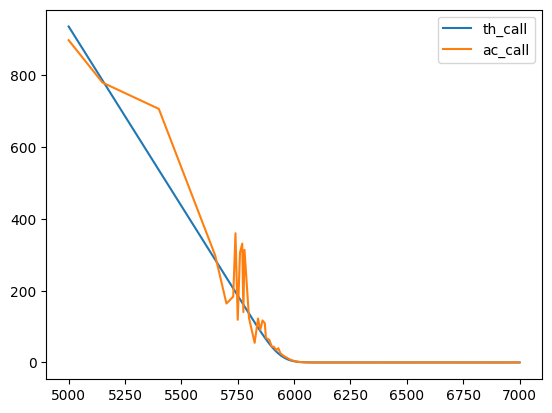

In [ ]:
call.plot() #plotting the actual and theoretical option prices

## BLACK-SCHOLES MODEL

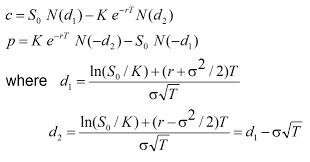

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [ ]:
def euro_vanilla(S, K, T, r, sigma, option):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """

    from scipy.stats import norm

    d1=(np.log(S/K)+(r+(sigma**2)/2)*T)/(sigma*T**0.5)
    d2=d1-(sigma*T**0.5)

    if option.lower() == 'call':
        premium = (S * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))
    elif option.lower() == 'put':
        premium = (K * np.exp(-r * T) * norm.cdf(-d2)) - (S * norm.cdf(-d1))
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return premium

In [ ]:
dfo.options[1]

'2024-12-24'

In [ ]:
date.today()

datetime.date(2024, 12, 22)

In [ ]:
N = 100
T = 1/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol, option="call")
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
5000.0,930.850102
5150.0,780.850102
5400.0,530.850103
5650.0,280.850103
5700.0,230.850103


In [ ]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
5000.0,898.20
5150.0,780.12
5400.0,706.70
5650.0,298.33
5700.0,164.31


In [ ]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
5000.0,930.850102,898.20
5150.0,780.850102,780.12
5400.0,530.850103,706.70
5650.0,280.850103,298.33
5700.0,230.850103,164.31
5730.0,200.850103,183.61
5740.0,190.850105,360.10
5750.0,180.850112,118.96
5760.0,170.850137,306.10
5770.0,160.850221,331.25


<Axes: >

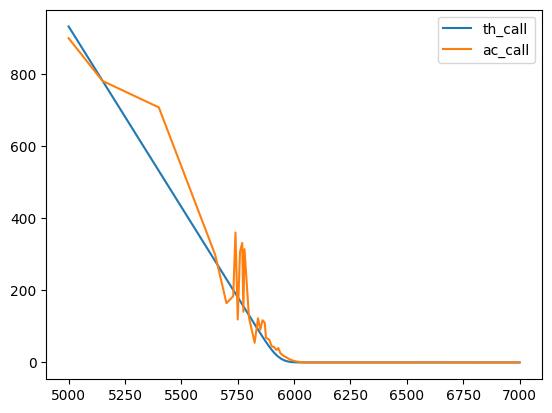

In [ ]:
call.plot() #plotting the actual and theoretical call prices

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
2400.0,0.0
2600.0,0.0
2800.0,0.0
3000.0,0.0
3200.0,0.0


In [ ]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
2400.0,0.05
2600.0,0.05
2800.0,0.05
3000.0,0.10
3200.0,0.10


In [ ]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)


,th_put,ac_put
6140.0,209.149896,187.53
6145.0,214.149895,191.00
6150.0,219.149895,168.72
6155.0,224.149895,79.10
6170.0,239.149895,181.10
6175.0,244.149895,113.92
6180.0,249.149895,128.33
6225.0,294.149895,290.70
6275.0,344.149895,179.64
6300.0,369.149895,346.05


<Axes: >

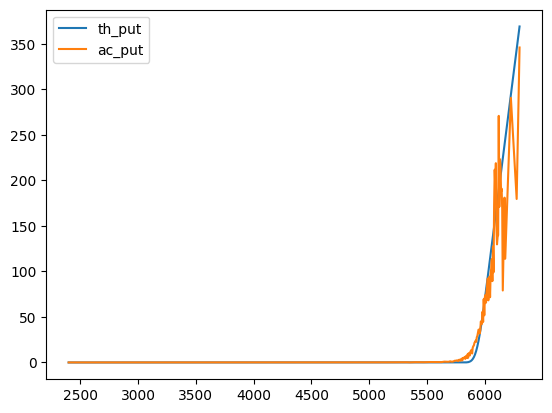

In [ ]:
put.plot()